In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [6]:
df = pd.read_csv(r"E:\download\output.csv")
df.shape

df = df.dropna();
df.head()

,Unnamed: 0.1,Unnamed: 0,title,text,label,num_words
0,0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,comment expected barack obama members fyf fuky...,1,871
1,2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,", demonstrators gathered last night exercising...",1,34
2,3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",dozen politically active pastors came private ...,0,1321
3,4,4,SATAN 2: Russia unvelis an image of its terrif...,"rs sarmat missile , dubbed satan , replace ss ...",1,329
4,5,5,About Time! Christian Group Sues Amazon and SP...,say one time someone sued southern poverty law...,1,244


Text(0.5, 1.0, 'Distribution of Fake - 0 /Real - 1 News')

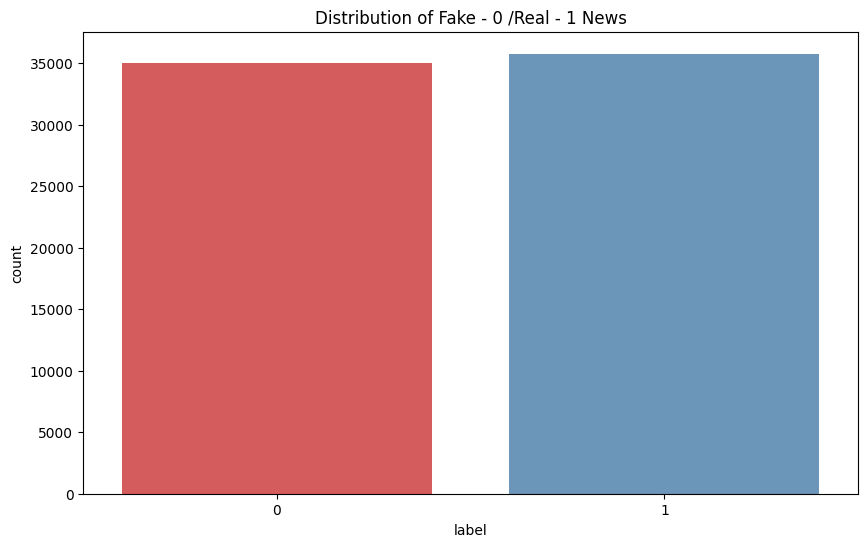

In [7]:
df['num_words'] = df['text'].apply(lambda x: len(x.split()))
plt.figure(figsize = (10,6))
sns.countplot(x = df['label'], palette = 'Set1', alpha = 0.8)
plt.title('Distribution of Fake - 0 /Real - 1 News')

In [8]:
# Import necessary libraries
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split



# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=10)

# Tokenize text data
tok = Tokenizer()
tok.fit_on_texts(x_train)

#return sequences
sequences = tok.texts_to_sequences(x_train)
test_sequences = tok.texts_to_sequences(x_test)

#print size of the vocabulary
print(f'Train vocabulary size: {len(tok.word_index)}')



Train vocabulary size: 184464


In [9]:
# Pad sequences
maxlen = 512
x_train = pad_sequences(sequences, padding='post', maxlen=maxlen)
x_test = pad_sequences(test_sequences, padding='post', maxlen=maxlen)

In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Bidirectional,Embedding,Dropout
from tensorflow.compat.v1.keras.layers import CuDNNLSTM,CuDNNGRU
from tensorflow.keras.layers import Dropout
from tensorflow.keras import activations

In [11]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

import tensorflow as tf

import keras

from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Model, Sequential
from keras.layers import GRU, Input, Dense, Activation, RepeatVector, Bidirectional, LSTM, Dropout, Embedding
from tensorflow.keras.layers import Embedding
from sklearn.model_selection import train_test_split 
from keras.losses import sparse_categorical_crossentropy
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import collections

from tensorflow.python.client import device_lib
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D

model = tf.keras.Sequential([
    Input(name='inputs',shape=[maxlen]),
    Embedding(len(tok.word_index), 128),
    Dropout(0.5),
    Conv1D(256, 5, activation='relu'),
    MaxPooling1D(pool_size=4),
    LSTM(128,  return_sequences=True),
    Dropout(0.5),
    Bidirectional(LSTM(64)),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


In [13]:
#compile model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

#model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 512, 128)          23611392  
                                                                 
 dropout (Dropout)           (None, 512, 128)          0         
                                                                 
 conv1d (Conv1D)             (None, 508, 256)          164096    
                                                                 
 max_pooling1d (MaxPooling1D  (None, 127, 256)         0         
 )                                                               
                                                                 
 lstm (LSTM)                 (None, 127, 128)          197120    
                                                                 
 dropout_1 (Dropout)         (None, 127, 128)          0         
                                                        

In [14]:
tf.keras.utils.plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [15]:
history = model.fit(x_train, y_train, epochs=20,
                    validation_split = 0.2, batch_size = 64, callbacks=[EarlyStopping(monitor='val_accuracy',mode='max', patience=3, verbose=False,restore_best_weights=True)])

Epoch 1/20
 33/708 [>.............................] - ETA: 4:34 - loss: 0.6898 - accuracy: 0.5369

KeyboardInterrupt: 

In [ ]:
epochs=1

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,10))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 10))
ax1.set_yticks(np.arange(-0.2, 1, 0.1))
ax1.legend()

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 10))
ax2.legend()

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [ ]:
with open('E:\Semester 3\Soft\lstm_model_Final_1.pkl', 'wb') as f:
    pickle.dump(model, f)


In [ ]:
# Save the trained model to disk
tf.keras.models.save_model(model, 'E:\Semester 3\Soft\lstm_model_Final_256')

In [ ]:
import joblib
joblib.dump(model, 'E:\Semester 3\Soft\model\Lstm_model_256.joblib')

In [ ]:
import pickle

# Specify the path to the pickled file
path_to_file = 'E:\Semester 3\Soft\lstm_model.pkl'

# Load the pickled object (in this case, a machine learning model)
with open(path_to_file, 'rb') as f:
    my_model = pickle.load(f)


In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
y_hat = model.predict(x_test)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

In [ ]:
y_pred_classes = np.where(y_hat >= 0.5, 1, 0)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
# Calculate accuracy score and confusion matrix
acc_score = accuracy_score(y_test, y_pred_classes)
cm = confusion_matrix(y_test, y_pred_classes)

print('Accuracy Score: ', acc_score)
print('Confusion Matrix: \n', cm)

In [ ]:
# print classification report
print(classification_report(y_test, np.where(y_hat >= 0.5, 1, 0)))

In [ ]:
#plot the confusion matrix
plt.figure(figsize = (8,6))

sns.heatmap(confusion_matrix(y_test, y_pred_classes), annot=True, 
            fmt='', cmap='Blues')

plt.xlabel('Predicted Labels')
plt.ylabel('Real Labels')

In [ ]:
# Define list of news articles to predict
news_articles = [
    "Demonstrators gathered last night exercising constitutional protected right peaceful protest order raise issues create change.",
    "president donald trump returned attacks biased media , weekend away washington d. c. fake media ( real media ) gotten even worse since election , wrote twitter . every story badly slanted . hold truth ! last week , media surprised trump referred honorable people event white house . trump appeared watching fox friends monday morning , praising show analysis . first days presidency exposed total failure last eight years foreign policy ! wrote . true .",
    "tentative deal reached weekend presidential campaigns hillary clinton bernie sanders includes debate thursday university new hampshire durham . msnbc announced sunday host debate , scheduled p.m. eastern chuck todd rachel maddow moderating . new hampshire first nation primary feb. . clinton sanders tight race monday iowa caucuses , clinton trails vermont senator new hampshire , raising possibility democratic front runner could lose first two contests . former maryland gov . martin omalley trailed wide margins . democratic national committee says reached agreement principal party sanction manage debates primary schedule , including new hampshire debate ."
]

# Loop over news articles and make predictions
for article in news_articles:
    # Preprocess news article
    x_test_processed_article = tokenizer.texts_to_sequences([article])
    x_test_processed_article_pad = pad_sequences(x_test_processed_article, padding='post', maxlen=maxlen)

    # Use trained model to predict whether news article is fake or real
    prediction = model.predict(x_test_processed_article_pad)
    y_pred_one = np.where(prediction >= 0.5, 1, 0)

    # Print prediction for current news article
    if y_pred_one == 0:
        print(f"The news article '{article}' is fake.")
    else:
        print(f"The news article '{article}' is real.")
